In [81]:
import math
class Node:
    """ This class is used to represent node structure.The node consists of following elements:
        *priority 
        *pointers to :parent
                     :any of the children
                     :left sibling
                     :right sibling
        *rank: number of children
        *mark: Either True or False, denoting whether the node has lost a child 
               since the last time this node was made child of another node.
               Newly created nodes are unmarked, and a node becomes unmarked whenever it is made child of another node.
        This node structure helps to create circular, doubly linked list."""
    def __init__(self, priority):
        #self.data = data
        self.priority = priority
        self.parent = self.child = None
        self.left = self
        self.right = self
        self.rank = 0
        self.mark= False


class FibonacciHeap:
    """ This class is used to represent the Fibonacci heap structure.It contains:
        *pointer to the minimum node in the root list.
        *An array is used to store children list for the nodes in root list.
        *A dictionary called map holds all the nodes and their pointers with (priority,address) as (key,value) pairs.
        Node structure is inherited from class Node."""
    
    def __init__(self):
        self.min = None
        self.array = [] 
        self.map = dict() 

    def __len__(self):
        return len(self.map) 
    
    # inserts new node in O(1) time
    def insert(self, priority):
        if priority in self.map:
            return False

        node = Node(priority)

        if self.min:
            """ add current node to the right of min[H] """
            node.left = self.min
            node.right = self.min.right
            self.min.right = node
            node.right.left = node

            if priority < self.min.priority:
                """ if current priority is less then min[H], set min[H] to current node """
                self.min = node
        else:
            self.min= node

        self.map[priority] = node
        return True
    
    # returns the minimun node in O(log n) time
    def remove_min(self):
        if len(self.map) == 0:
            raise ValueError("Fibonacci heap is empty")

        m = self.min
        numchild = m.rank
        x = m.child
        
        while ( numchild>0):
            temp = x.right
            x.right.left = x.left
            x.left.right = x.right
            
            x.right = self.min.right
            x.left = self.min
            self.min.right = x
            x.right.left = x

            x.parent = None
            x = temp
            numchild -= 1

        m.left.right = m.right
        m.right.left = m.left

        if m == m.right:
            self.min = None
        else:
            self.min = m.right
            self.consolidate()

        priority = m.priority
        del self.map[priority]
        return priority

   
    # reduces the priority of a node with the given value
    def decrease_key(self, priority, priority_new):
        newnode = self.map[priority]

        if not newnode :
            return False

        if newnode.priority <= priority_new:
            return False

        newnode.priority = priority_new
        y = newnode.parent
        x = newnode

        if y and x.priority < y.priority:
            self.cut(x, y)
            self.cascade_cut(y)

        if self.min.priority > x.priority:
            self.min = x

        return True
    
    
    
    def consolidate(self):
        """ This function is used to reduce the number of trees in the root list of Fibonacci heap.
        It consists of repeated merging of two trees with same rank until every root in the root list has a distinct value. """
        a= math.floor(math.log(len(self.map))) *(1 / math.log((1 + math.sqrt(5)) / 2)) + 1
        for i in range(len(self.array)):
            self.array[i] = None
       
        
        while len(self.array) < a:
            self.array.append(None)
        x = self.min
        number_of_root_nodes = 0

        if x:
            number_of_root_nodes = 1
            x = x.right

            while x != self.min: #get the number of root nodes
                number_of_root_nodes += 1
                x = x.right

        while number_of_root_nodes:
            next = x.right
            rank = x.rank
            

            while self.array[rank]:
                y = self.array[rank]

                if x.priority > y.priority: #Compares to decide the parent
                    temp = y
                    y = x
                    x = temp

                self.link(y, x)
                self.array[rank] = None
                rank += 1

            self.array[rank] = x
            x = next
            number_of_root_nodes-= 1

        self.min = None

        for y in self.array:
            if y:
                if not self.min:
                    self.min = y
                else:
                    y.left.right = y.right
                    y.right.left = y.left

                    y.left = self.min
                    y.right = self.min.right
                    self.min.right = y
                    y.right.left = y

                    if self.min.priority > y.priority:
                        self.min = y

   
        
    def cut(self, x, y):
        """This function is used to remove x from the child list of y, decrementing rank of y"""
        x.left.right = x.right
        x.right.left = x.left
        y.rank -= 1

        if y.child == x:
            y.child = x.right

        if y.rank == 0:
            y.child = None
            
        x.right = self.min.right  
        x.left = self.min
        self.min.right = x
        x.right.left = x

        x.parent = None
        x.mark = False

    def cascade_cut(self, y):
        """This function is used remove link when x might be second child cut from parent y. It calls itself recursively making 
           its way up the tree untill either a root or an unmarked node is found."""
        x = y.parent
        if x is not None:
            if y.mark is False:
                y.mark = True
            else:
                self.cut(y, x)
                self.cascade_cut(x)
                
    def link(self, y, x):
        """Called by consolidate function. Used to merge two trees with same rank having roots x and y. This is done by connecting
           y as leftmost child of x and increasing rank of x."""
        y.left.right = y.right
        y.right.left = y.left

        y.parent = x

        if not x.child:
            x.child = y
            y.right = y
            y.left = y
        else:
            y.left = x.child
            y.right = x.child.right
            x.child.right = y
            y.right.left = y

        x.rank += 1

In [82]:
#Testing heap operations

f = FibonacciHeap();
for i in range(5):
    f.insert(i)
print(f.min.priority)
print('left priority',f.min.left.priority)
print('right priority',f.min.right.priority)
print(f.__len__())
print(f.remove_min())
print(f.min.priority)
print('left priority',f.min.left.priority)
print('right priority',f.min.right.priority)
print(f.__len__())
print(f.remove_min())
print(f.min.priority)
print('left priority', f.min.left.priority)
print('right priority',f.min.right.priority)
print(f.__len__())
print(f.decrease_key(3,1))
print(f.min.priority)
print('left priority', f.min.left.priority)
print('right priority',f.min.right.priority)
print(f.__len__())

0
left priority 1
right priority 4
5
0
1
left priority 1
right priority 1
4
1
2
left priority 3
right priority 3
3
True
1
left priority 2
right priority 2
3


In [83]:
# Comparing amortized time complexities of insert and decrease key operations of Fibonacci heap with Binary heap.
import math
import pylab
import numpy as np
import matplotlib.patches as mpatches

heights=[]
f = FibonacciHeap();
f1 = FibonacciHeap();
f2 = FibonacciHeap();
f3 = FibonacciHeap();
f4 = FibonacciHeap();
f5 = FibonacciHeap();
f6 = FibonacciHeap();
f11 = FibonacciHeap();
f21 = FibonacciHeap();
f31 = FibonacciHeap();
f41 = FibonacciHeap();
f51 = FibonacciHeap();
f61 = FibonacciHeap();

def f_insert(n):
    #f = FibonacciHeap();
    for item in range(n):
        f.insert(item)
        

sizes = [10000, 20000, 40000, 80000, 160000, 320000]

for n in sizes:
    print("Timing for insert n =",n)
    %timeit f_insert(n)
    
print("n=10000")
for item in range(10000):
        f1.insert(item)
f1.remove_min()
print("Time for decrease_key:")
%timeit f1.decrease_key(5000,0)

for item in range(20000):
        f2.insert(item)
f2.remove_min()  
print("Time for decrease_key:")
%timeit f2.decrease_key(10000,0)

for item in range(40000):
        f3.insert(item)
f3.remove_min()
print("Time for decrease_key:")
%timeit f3.decrease_key(20000,0)
      
for item in range(80000):
        f4.insert(item)
f4.remove_min()
print("Time for decrease_key:")
%timeit f4.decrease_key(40000,0)

for item in range(160000):
        f5.insert(item)
f5.remove_min() 
print("Time for decrease_key:")
%timeit f5.decrease_key(80000,0)

for item in range(320000):
        f6.insert(item)
f6.remove_min()
print("Time for decrease_key:")
%timeit f6.decrease_key(160000,0)

Timing for insert n = 10000
The slowest run took 8.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 4.35 ms per loop
Timing for insert n = 20000
The slowest run took 4.38 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 8.66 ms per loop
Timing for insert n = 40000
The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 17.1 ms per loop
Timing for insert n = 80000
The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 35.2 ms per loop
Timing for insert n = 160000
The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 68.2 ms per loop
Timing for insert n = 320000
The slowest run took 4.63 times longer than the f

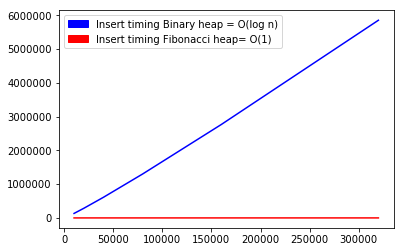

In [80]:
import matplotlib.patches as mpatches
y= [4.19, 8.47, 16.9, 33.5, 66.8, 133]
y1=[]
plt.plot(sizes, y, color='red')
red_patch = mpatches.Patch(color='red', label='Insert timing Fibonacci heap= O(1)')
for n in sizes:
    y1.append(n*math.log(n,2))
plt.plot(sizes, y1,color='blue')
blue_patch = mpatches.Patch(color='blue', label='Insert timing Binary heap = O(log n)')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

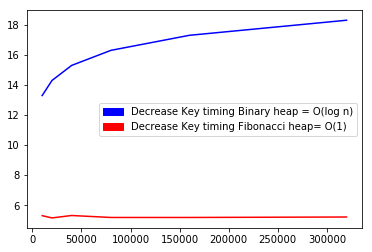

In [79]:
y= [531/100, 516/100, 532/100, 519/100, 519/100, 522/100] # scaling to show comparison
y1=[]
plt.plot(sizes, y, color='red')
red_patch = mpatches.Patch(color='red', label='Decrease Key timing Fibonacci heap= O(1)')
for n in sizes:
    y1.append(math.log(n,2))
plt.plot(sizes, y1,color='blue')
blue_patch = mpatches.Patch(color='blue', label='Decrease Key timing Binary heap = O(log n)')
plt.legend(handles=[ blue_patch, red_patch])
plt.show()